In [1]:
using BoundaryValueDiffEq, ModelingToolkit, Plots, Printf
using ModelingToolkit: t_nounits as t, D_nounits as D
using OrdinaryDiffEq

In [8]:
@mtkmodel TEARING begin
    @constants begin
        S = 10
        k = 0.5
    end
    @parameters begin
        γ = missing
    end
    @variables begin
        F(t)
        ψ(t) = 1 # at t=0
        φ(t) = 0 # at t=0
    end
    @equations begin
        F ~ tanh(t)
        S * γ * (ψ - F * φ) ~ (D(D(ψ)) - k^2 * ψ)
        γ^2 * (D(D(φ)) - k^2 * φ) ~ -F * D(D(ψ)) + F * k^2 * ψ + D(D(F)) * ψ
    end
end
@mtkcompile sys = TEARING()

Model sys:
Equations (4):
  4 standard: see equations(sys)
Unknowns (4): see unknowns(sys)
  φ(t) [defaults to 0]
  ψ(t) [defaults to 1]
  ψˍt(t)
  φˍt(t)
Parameters (3): see parameters(sys)
  γ [defaults to missing]
  k [defaults to 0.5]
  S [defaults to 10]
Observed (3): see observed(sys)

In [18]:
# initial state vector at t=0
u0 = [0.0, 1.0, 0.0, 36.0]

function bca!(res, u, p)
    res[1] = u[3] # ψ'(0) = 0
    res[2] = u[1] # ϕ(0) = 0
    #res[3] = u[2] - 1 # normalization : ψ(0) = 1
end

function bcb!(res, u, p)
    res[1] = u[2] # ψ(L) 0 0
    res[2] = u[1] # ϕ(L) 0 0
end

L = 20
tspan = (0, L)

(0, 20)

In [22]:
mtkprob = BVProblem(sys, [D(sys.ψ) => 0], tspan; guesses=[D(sys.φ) => 36, sys.γ => 0.123])

LoadError: No methods were found for the model function passed to the equation solver.
The function `f` needs to have dispatches, for example, for an ODEProblem
`f` must define either `f(u,p,t)` or `f(du,u,p,t)`. For more information
on how the model function `f` should be defined, consult the docstring for
the appropriate `AbstractSciMLFunction`.

Offending function: [31m[1mf[22m[39m

In [13]:
sol = solve(mtkprob, MIRK6(), dt=0.05)

retcode: Success
Interpolation: MIRK Order 6 Interpolation
t: 801-element Vector{Float64}:
  0.0
  0.025
  0.05
  0.07500000000000001
  0.1
  0.125
  0.15
  0.175
  0.2
  0.225
  0.25
  0.275
  0.3
  ⋮
 19.725
 19.75
 19.775
 19.8
 19.825000000000003
 19.85
 19.875
 19.9
 19.924999999999997
 19.95
 19.975
 20.0
u: 801-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 ⋮
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0]

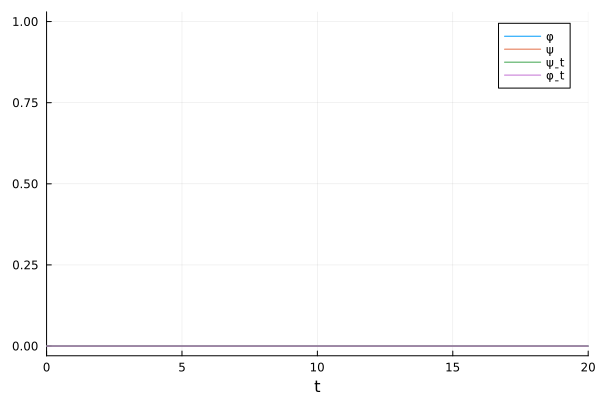

In [20]:
plot(sol)